<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/yeonjeong/ev_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
!unzip -qq "/content/drive/MyDrive/[원천]자동차번호판OCR데이터.zip"

replace 01가0785.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# matchTemplete
---
- 원본 이미지에서 templete를 조금씩 이동해가면서 원본 이미지와 동일하거나 가장 유사한 영역을 원본 이미지에서 검출하는 방식

- 입력 영상의 밝기가 큰 경우 correlation이 크게 나와서 결과값이 잘 못 나올 가능성이 있기에 nomalize 방법을 사용하는 것이 좀 더 정확함.

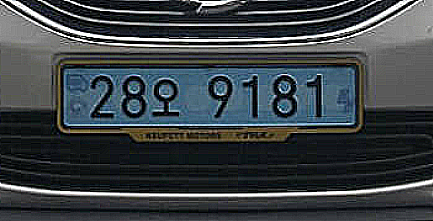

In [ ]:
#자동차 번호판 이미지
CarNumber = cv2.imread('/content/drive/MyDrive/화면 캡처 2022-09-17 191929.png')

#EV 마크 이미지 
EV = cv2.imread('/content/drive/MyDrive/ev.png')

#print(EV.shape)
#print(CarNumber.shape)

EV = cv2.resize(EV,(30,40))
#print(EV.shape)






# Image Sharpening
---
- sharpening은 영상의 에지를날카롭게  표현한다.
- 커널을 변경해서, 이미지의 가장자리를 강조하거나 강화하는 샤프닝을 구현이 가능하다.

--> 따라서 번호판의 에지를 더 선명하게 나타내기 위한 이미지 전처리 작업을 진행하였다.

In [ ]:
# 번호판 이미지 sharpening 과정 거치기

kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(CarNumber,-1,kernel_sharpening)

cv2_imshow(sharpened)



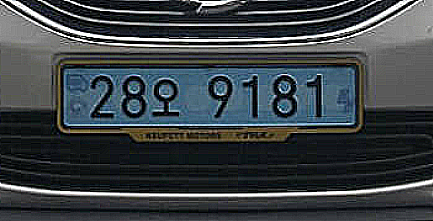

In [ ]:
result = cv2.matchTemplate(sharpened,EV,cv2.TM_SQDIFF_NORMED)

cv2_imshow(sharpened)
cv2_imshow(EV)

# cv2.matchTemplate error
---
- error(-215) : 이미지 사이즈가 너무 큰 경우 발생 ->이미지 사이즈 조정으로 해결


In [ ]:
threshold = .15

loc = np.where(result >= threshold)

print(loc)

(array([  0,   0,   0, ..., 181, 181, 181]), array([  0,   1,   2, ..., 401, 402, 403]))


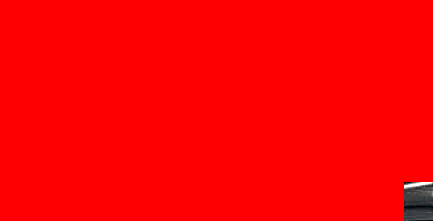

In [ ]:
h,w = sharpened.shape[:-1]

for pt in zip(*loc[::-1]):
    cv2.rectangle(sharpened, pt, (pt[0] + w, pt[1] + h), (0,0,255),1)

cv2_imshow(sharpened)

"\n#img_rab : 차량 번호판 이미지\nimg_rgb = cv2.imread('/content/drive/MyDrive/화면 캡처 2022-09-17 191709.png')\n\n#img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)\n\n# 번호판 이미지 sharpening 과정 거치기\n\nkernel_sharpening = np.array([[-1,-1,-1],\n                              [-1,9,-1],\n                              [-1,-1,-1]])\n\nsharpened = cv2.filter2D(img_rgb,-1,kernel_sharpening)\n\ncv2_imshow(img_rgb)\n"